# Xibc analysis
This notebook presents all study on Xibc decay to LbK. 
As a model I will use xgboost. 

Study roadmap
------

1. Grab MC signal and real data from the NTuple.  
2. Separate real data to background and test subsets 
3. Print features distributions (comparison plots) 
4. Train BDT 
*  try to tune BDThyperparameters to obtain the possible best resuls (measeuread as a 
* Print BDT repsponse value for both MC and data
* to be continued
--------

In [3]:
print("Kernel is alive!")

Kernel is alive!


In [ ]:
import root_numpy
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import ROOT
%matplotlib inline

import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns

#sklearn imports 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import KFold
from sklearn import cross_validation
from sklearn.metrics import roc_curve, auc
from sklearn import grid_search
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb


from sklearn.externals import joblib

## The very first step is to grab data from NTuple. 

I take as a signal MC data and as a background wrong sign data.  

Below filed contains all branches names. For the further analysis I will grab only a tiny part of then.

In [3]:
all_branches = ["Xb_ENDVERTEX_X",
"Xb_ENDVERTEX_Y",
"Xb_ENDVERTEX_Z",
"Xb_OWNPV_X",
"Xb_OWNPV_Y",
"Xb_OWNPV_Z",
"Xb_OWNPV_CHI2",
"Xb_OWNPV_NDOF",
"Xb_IP_OWNPV",
"Xb_IPCHI2_OWNPV",
"Xb_FD_OWNPV",
"Xb_FDCHI2_OWNPV",
"Xb_DIRA_OWNPV",
"Xb_P",
"Xb_PT",
"Xb_PE",
"Xb_PX",
"Xb_PY",
"Xb_PZ",
"Xb_M",
"Xb_LOKI_CHI2NDOF_LcConstr",
"Xb_LOKI_DIRA",
"Xb_LOKI_DTF_CTAU",
"Xb_LOKI_FDCHI2",
"Xb_LOKI_MASS_LcConstr",
"Xb_LOKI_VCHI2NDOF_LcConstr",
"Xb_TAU",
"Xb_L0Global_Dec",
"Xb_L0Global_TIS",
"Xb_L0Global_TOS",
"Xb_Hlt1Global_TIS",
"Xb_Hlt1Global_TOS",
"Xb_Hlt1Phys_Dec",
"Xb_Hlt1Phys_TIS",
"Xb_Hlt1Phys_TOS",
"Xb_Hlt2Global_Dec",
"Xb_Hlt2Global_TIS",
"Xb_Hlt2Global_TOS",
"Xb_Hlt2Phys_Dec",
"Xb_Hlt2Phys_TIS",
"Xb_Hlt2Phys_TOS",
"Xb_L0DiMuonDecision_Dec",
"Xb_L0DiMuonDecision_TIS",
"Xb_L0DiMuonDecision_TOS",
"Xb_L0HCALDecision_Dec",
"Xb_L0HCALDecision_TIS",
"Xb_L0HCALDecision_TOS",
"Xb_L0HadronDecision_Dec",
"Xb_L0HadronDecision_TIS",
"Xb_L0HadronDecision_TOS",
"Xb_L0MuonDecision_Dec",
"Xb_L0MuonDecision_TIS",
"Xb_L0MuonDecision_TOS",
"Xb_L0MuonHighDecision_Dec",
"Xb_L0MuonHighDecision_TIS",
"Xb_L0MuonHighDecision_TOS",
            
"Xc_ENDVERTEX_X",
"Xc_ENDVERTEX_Y",
"Xc_ENDVERTEX_Z",
"Xc_ENDVERTEX_CHI2",
"Xc_ENDVERTEX_NDOF",
"Xc_OWNPV_X",
"Xc_OWNPV_Y",
"Xc_OWNPV_Z",
"Xc_OWNPV_CHI2",
"Xc_OWNPV_NDOF",
"Xc_IPCHI2_OWNPV",
"Xc_FD_OWNPV",
"Xc_FDCHI2_OWNPV",
"Xc_DIRA_OWNPV",
"Xc_ORIVX_X",
"Xc_ORIVX_Y",
"Xc_ORIVX_Z",
"Xc_ORIVX_CHI2",
"Xc_ORIVX_NDOF",
"Xc_FD_ORIVX",
"Xc_FDCHI2_ORIVX",
"Xc_DIRA_ORIVX",
"Xc_P",
"Xc_PT",
"Xc_PE",
"Xc_PX",
"Xc_PY",
"Xc_PZ",
"Xc_M",
"Xc_ID",
"Xc_TAU",
            
"p_MC12TuneV2_ProbNNe",
"p_MC12TuneV2_ProbNNmu",
"p_MC12TuneV2_ProbNNpi",
"p_MC12TuneV2_ProbNNk",
"p_MC12TuneV2_ProbNNp",
"p_MC12TuneV2_ProbNNghost",
"p_MC12TuneV3_ProbNNe",
"p_MC12TuneV3_ProbNNmu",
"p_MC12TuneV3_ProbNNpi",
"p_MC12TuneV3_ProbNNk",
"p_MC12TuneV3_ProbNNp",
"p_MC12TuneV3_ProbNNghost",
"p_OWNPV_X",
"p_OWNPV_Y",
"p_OWNPV_Z",
"p_OWNPV_CHI2",
"p_OWNPV_NDOF",
"p_IP_OWNPV",
"p_IPCHI2_OWNPV",
"p_ORIVX_X",
"p_ORIVX_Y",
"p_ORIVX_Z",
"p_ORIVX_CHI2",
"p_ORIVX_NDOF",
"p_P",
"p_PT",
"p_PE",
"p_PX",
"p_PY",
"p_PZ",
"p_M",
"p_PIDe",
"p_PIDmu",
"p_PIDK",
"p_PIDp",
"p_ProbNNe",
"p_ProbNNk",
"p_ProbNNp",
"p_ProbNNpi",
"p_ProbNNmu",
"p_ProbNNghost",
"p_hasMuon",
"p_isMuon",
"p_hasRich",
"p_hasCalo",
"k_MC12TuneV2_ProbNNe",
"k_MC12TuneV2_ProbNNmu",
"k_MC12TuneV2_ProbNNpi",
"k_MC12TuneV2_ProbNNk",
"k_MC12TuneV2_ProbNNp",
"k_MC12TuneV2_ProbNNghost",
"k_MC12TuneV3_ProbNNe",
"k_MC12TuneV3_ProbNNmu",
"k_MC12TuneV3_ProbNNpi",
"k_MC12TuneV3_ProbNNk",
"k_MC12TuneV3_ProbNNp",
"k_MC12TuneV3_ProbNNghost",
"k_OWNPV_X",
"k_OWNPV_Y",
"k_OWNPV_Z",
"k_OWNPV_CHI2",
"k_OWNPV_NDOF",
"k_IP_OWNPV",
"k_IPCHI2_OWNPV",
"k_ORIVX_X",
"k_ORIVX_Y",
"k_ORIVX_Z",
"k_ORIVX_CHI2",
"k_ORIVX_NDOF",
"k_P",
"k_PT",
"k_PE",
"k_PX",
"k_PY",
"k_PZ",
"k_M",
"k_ID",
"k_PIDe",
"k_PIDmu",
"k_PIDK",
"k_PIDp",
"k_ProbNNe",
"k_ProbNNk",
"k_ProbNNp",
"k_ProbNNpi",
"k_ProbNNmu",
"k_ProbNNghost",
"k_hasMuon",
"k_isMuon",
"k_hasRich",
"k_hasCalo",
"pi_MC12TuneV2_ProbNNe",
"pi_MC12TuneV2_ProbNNmu",
"pi_MC12TuneV2_ProbNNpi",
"pi_MC12TuneV2_ProbNNk",
"pi_MC12TuneV2_ProbNNp",
"pi_MC12TuneV2_ProbNNghost",
"pi_MC12TuneV3_ProbNNe",
"pi_MC12TuneV3_ProbNNmu",
"pi_MC12TuneV3_ProbNNpi",
"pi_MC12TuneV3_ProbNNk",
"pi_MC12TuneV3_ProbNNp",
"pi_MC12TuneV3_ProbNNghost",
"pi_OWNPV_X",
"pi_OWNPV_Y",
"pi_OWNPV_Z",
"pi_OWNPV_XERR",
"pi_OWNPV_YERR",
"pi_OWNPV_ZERR",
"pi_OWNPV_CHI2",
"pi_OWNPV_NDOF",
"pi_IP_OWNPV",
"pi_IPCHI2_OWNPV",
"pi_ORIVX_X",
"pi_ORIVX_Y",
"pi_ORIVX_Z",
"pi_ORIVX_CHI2",
"pi_ORIVX_NDOF",
"pi_P",
"pi_PT",
"pi_PE",
"pi_PX",
"pi_PY",
"pi_PZ",
"pi_M",
"pi_ProbNNe",
"pi_ProbNNk",
"pi_ProbNNp",
"pi_ProbNNpi",
"pi_ProbNNmu",
"pi_ProbNNghost",
"pi_hasMuon",
"pi_isMuon",
"pi_hasRich",
"pi_hasCalo",
"XcK_MC12TuneV2_ProbNNe",
"XcK_MC12TuneV2_ProbNNmu",
"XcK_MC12TuneV2_ProbNNpi",
"XcK_MC12TuneV2_ProbNNk",
"XcK_MC12TuneV2_ProbNNp",
"XcK_MC12TuneV2_ProbNNghost",
"XcK_MC12TuneV3_ProbNNe",
"XcK_MC12TuneV3_ProbNNmu",
"XcK_MC12TuneV3_ProbNNpi",
"XcK_MC12TuneV3_ProbNNk",
"XcK_MC12TuneV3_ProbNNp",
"XcK_MC12TuneV3_ProbNNghost",
"XcK_OWNPV_X",
"XcK_OWNPV_Y",
"XcK_OWNPV_Z",
"XcK_OWNPV_CHI2",
"XcK_OWNPV_NDOF",
"XcK_IP_OWNPV",
"XcK_IPCHI2_OWNPV",
"XcK_ORIVX_X",
"XcK_ORIVX_Y",
"XcK_ORIVX_Z",
"XcK_ORIVX_CHI2",
"XcK_ORIVX_NDOF",
"XcK_P",
"XcK_PT",
"XcK_PE",
"XcK_PX",
"XcK_PY",
"XcK_PZ",
"XcK_M",
"XcK_ID",
"XcK_PIDe",
"XcK_PIDmu",
"XcK_PIDK",
"XcK_PIDp",
"XcK_ProbNNe",
"XcK_ProbNNk",
"XcK_ProbNNp",
"XcK_ProbNNpi",
"XcK_ProbNNmu",
"XcK_ProbNNghost",
"XcK_hasMuon",
"XcK_isMuon",
"XcK_hasRich",
"XcK_hasCalo"]

## List of branches, that could be important in the further studies

In [60]:
branches = ["Xb_IP_OWNPV",
            "Xb_P",
            "Xb_PT",
            "Xb_LOKI_CHI2NDOF_LcConstr",
            "Xb_LOKI_DIRA",
            "Xb_ENDVERTEX_CHI2",
            "Xb_ENDVERTEX_X",
            "Xb_ENDVERTEX_Y",
            "Xb_OWNPV_X",
            "Xb_OWNPV_Y",
            "Xb_M",
            
            "Xc_IP_OWNPV",
            "Xc_P",
            "Xc_PT",
            "Xc_DIRA_OWNPV",
            "Xc_ENDVERTEX_CHI2",
            "Xc_M",
            
            "p_MC12TuneV3_ProbNNp",
            "p_P",
            "p_PT",
 
            "k_MC12TuneV3_ProbNNk",
            "k_P",
            "k_PT",
            
            "pi_MC12TuneV3_ProbNNpi",
            "pi_P",
            "pi_PT",
            
            "XcK_MC12TuneV3_ProbNNk",
            "XcK_P",
            "XcK_PT",

            ]

In [12]:
! ls ../datasets/eos_data/mc

Xb2LbK_mcU.root  Xibc2lbK.root


In [61]:
root_file_mc = ROOT.TFile("../datasets/eos_data/mc/Xb2LbK_mcU.root")
root_file_mc.cd("MyXb0")
tree_signal = ROOT.gDirectory.Get("mytree")
signal_mc = pd.DataFrame(root_numpy.tree2array(tree_signal, branches=branches))
signal_mc["Label"] = True


root_file_data = ROOT.TFile("../datasets/eos_data/data/Xibc2LbK_2011D.root")
root_file_data.cd("MyXb0")
tree_data = ROOT.gDirectory.Get("mytree")
real_data = pd.DataFrame(root_numpy.tree2array(tree_data, branches=branches))

In [62]:
def transform_data(data):
    out = data
    out["radi"]=numpy.sqrt(numpy.power(data.Xb_ENDVERTEX_X-data.Xb_OWNPV_X,2)+numpy.power(data.Xb_ENDVERTEX_Y-data.Xb_OWNPV_Y,2))
    out=out.drop(["Xb_ENDVERTEX_X", "Xb_OWNPV_X","Xb_ENDVERTEX_Y", "Xb_OWNPV_Y" ], axis=1).astype(numpy.float64)
    return out

In [63]:
signal_mc = transform_data(signal_mc)
signal_mc.tail()

,Xb_IP_OWNPV,Xb_P,Xb_PT,Xb_LOKI_CHI2NDOF_LcConstr,Xb_LOKI_DIRA,Xb_ENDVERTEX_CHI2,Xb_M,Xc_IP_OWNPV,Xc_P,Xc_PT,...,k_P,k_PT,pi_MC12TuneV3_ProbNNpi,pi_P,pi_PT,XcK_MC12TuneV3_ProbNNk,XcK_P,XcK_PT,Label,radi
2726,0.010912,180776.942953,10312.372652,0.334856,0.999999,0.065401,6890.931152,0.395052,41917.600594,1620.378053,...,11428.476619,250.086531,0.923276,10347.065705,499.957108,0.510250,138930.116225,9588.180277,1,0.443688
2727,0.016963,178056.616731,10479.065445,1.737135,0.999998,3.705468,6244.654297,0.311323,39186.099874,1253.375731,...,11428.476619,250.086531,0.995939,7618.996018,254.028458,0.510250,138930.116225,9588.180277,1,0.460090
2728,0.006750,119437.811751,14319.552460,0.930583,0.999995,0.500060,6829.182617,0.109286,55734.146576,9494.283415,...,10863.878645,2130.629205,0.999737,5473.996060,642.915957,0.950973,63873.382051,4967.823533,1,0.263860
2729,0.020707,103480.465319,12884.646464,1.610175,0.999986,0.002400,6915.185547,0.247042,48141.187102,8796.518237,...,9101.759468,1603.656638,0.991180,20250.089419,4115.333362,0.985207,55512.540776,4327.855840,1,0.484415
2730,0.017416,72911.626010,8157.945387,1.690245,0.999973,0.063833,6892.305176,0.144124,44208.515513,4905.487220,...,13331.064029,1823.577551,0.998110,14591.064102,1868.744182,0.997685,28962.053937,5067.031906,1,0.257525


In [64]:
real_data = transform_data(real_data)
real_data.tail()

,Xb_IP_OWNPV,Xb_P,Xb_PT,Xb_LOKI_CHI2NDOF_LcConstr,Xb_LOKI_DIRA,Xb_ENDVERTEX_CHI2,Xb_M,Xc_IP_OWNPV,Xc_P,Xc_PT,...,k_MC12TuneV3_ProbNNk,k_P,k_PT,pi_MC12TuneV3_ProbNNpi,pi_P,pi_PT,XcK_MC12TuneV3_ProbNNk,XcK_P,XcK_PT,radi
109462,0.047608,190938.827431,9223.746172,5.306525,0.999997,7.628954,6892.785645,0.134469,179582.338738,10127.543174,...,0.152047,80947.014656,4210.592923,0.964050,54526.979876,3388.360649,0.759365,11457.423144,914.854521,0.894553
109463,0.007896,176206.729258,27534.937568,2.188278,0.999999,1.001912,5488.369629,0.173644,96293.431236,16994.875985,...,0.920999,19674.592822,4037.935662,0.996049,8380.560020,1504.489947,0.438097,79903.406835,10619.683337,1.228521
109464,0.008547,167007.643295,30374.097802,4.438321,1.000000,1.472161,5844.385254,0.836372,36019.117249,7674.767419,...,0.698455,10405.371718,1950.998386,0.989356,12809.989645,3189.413625,0.568191,131023.569591,22726.793094,4.297517
109465,0.027733,67555.111627,9439.771929,1.250933,0.999997,0.150478,5601.329590,0.452767,51619.227232,7561.206340,...,0.889334,17341.694958,2543.323128,0.996543,15906.005897,2207.986537,0.996875,16110.247390,2989.309943,1.663726
109466,0.014385,146000.914250,8266.214510,15.947953,0.999983,0.038217,6314.634277,0.141552,38250.054190,4027.098398,...,0.917822,15674.088310,2290.205208,0.992803,7397.342366,652.483300,0.207615,107821.934562,4424.161110,0.133466


### Print histograms

At the begining of my study I will focus on presentation of the data.   
This is very important step. I need to know how data looks, what features can be usefull etc. 

In [65]:
def print_features_histograms(features, histogramName):
    hist_params = {'normed': True, 'bins': 60, 'alpha': 0.4}
    # create the figure
    fig = plt.figure(figsize=(16,  25))
    fig.suptitle(histogramName, fontsize=20)
    for n, feature in enumerate(features):
        # add sub plot on our figure
        ax = fig.add_subplot(features.shape[1] // 5 + 1, 6, n + 1)
        # define range for histograms by cutting 1% of data from both ends
        min_value, max_value = numpy.percentile(features[feature], [1, 99])
        ax.hist(features[feature].values, range=(min_value, max_value), 
                 label='data', **hist_params)
        ax.legend(loc='best')

        ax.set_title(feature)

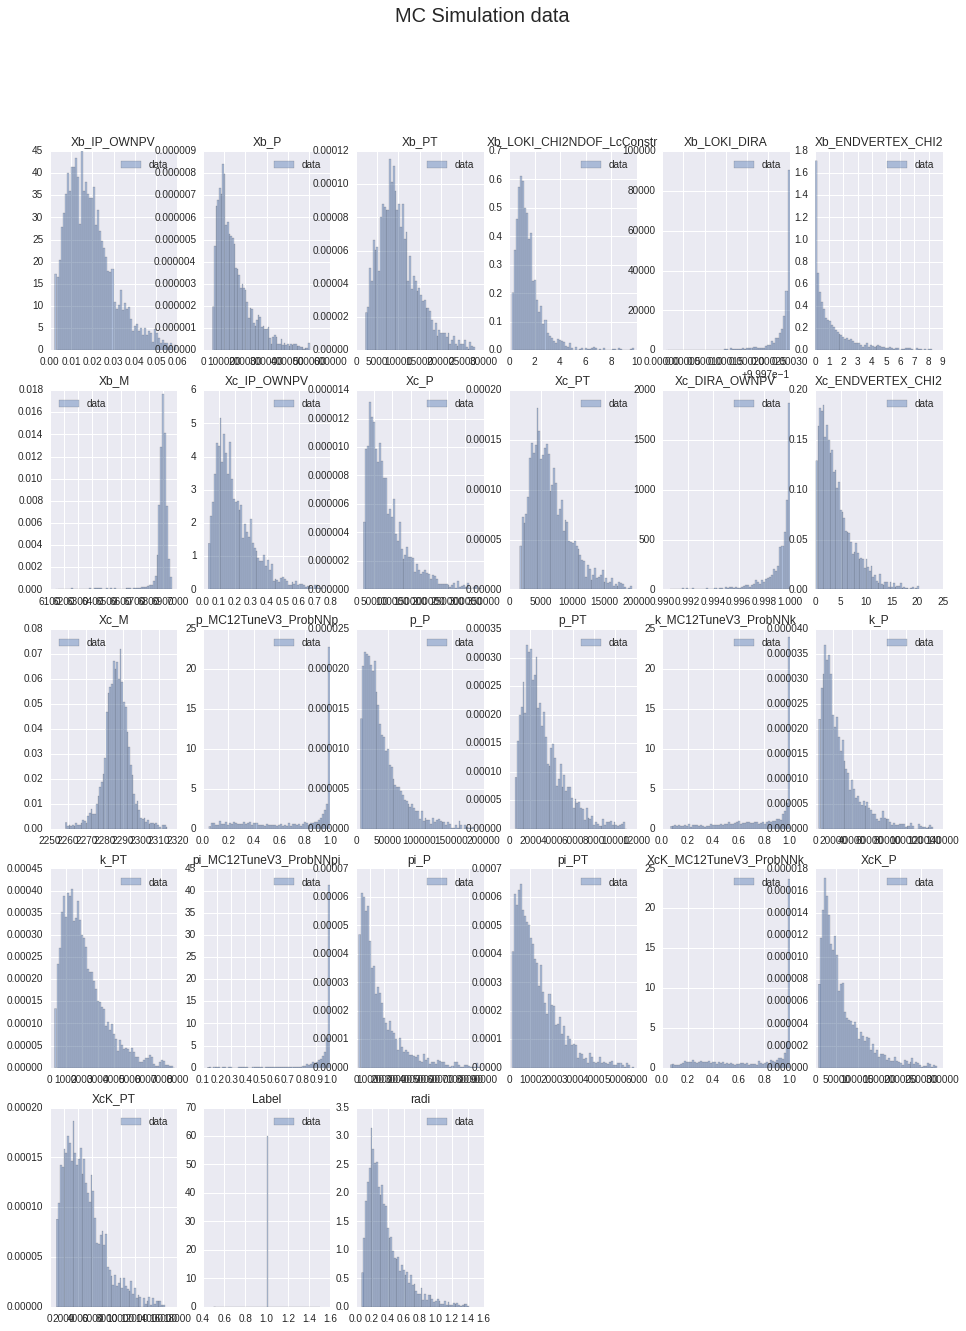

In [66]:
print_features_histograms(signal_mc,"MC Simulation data")

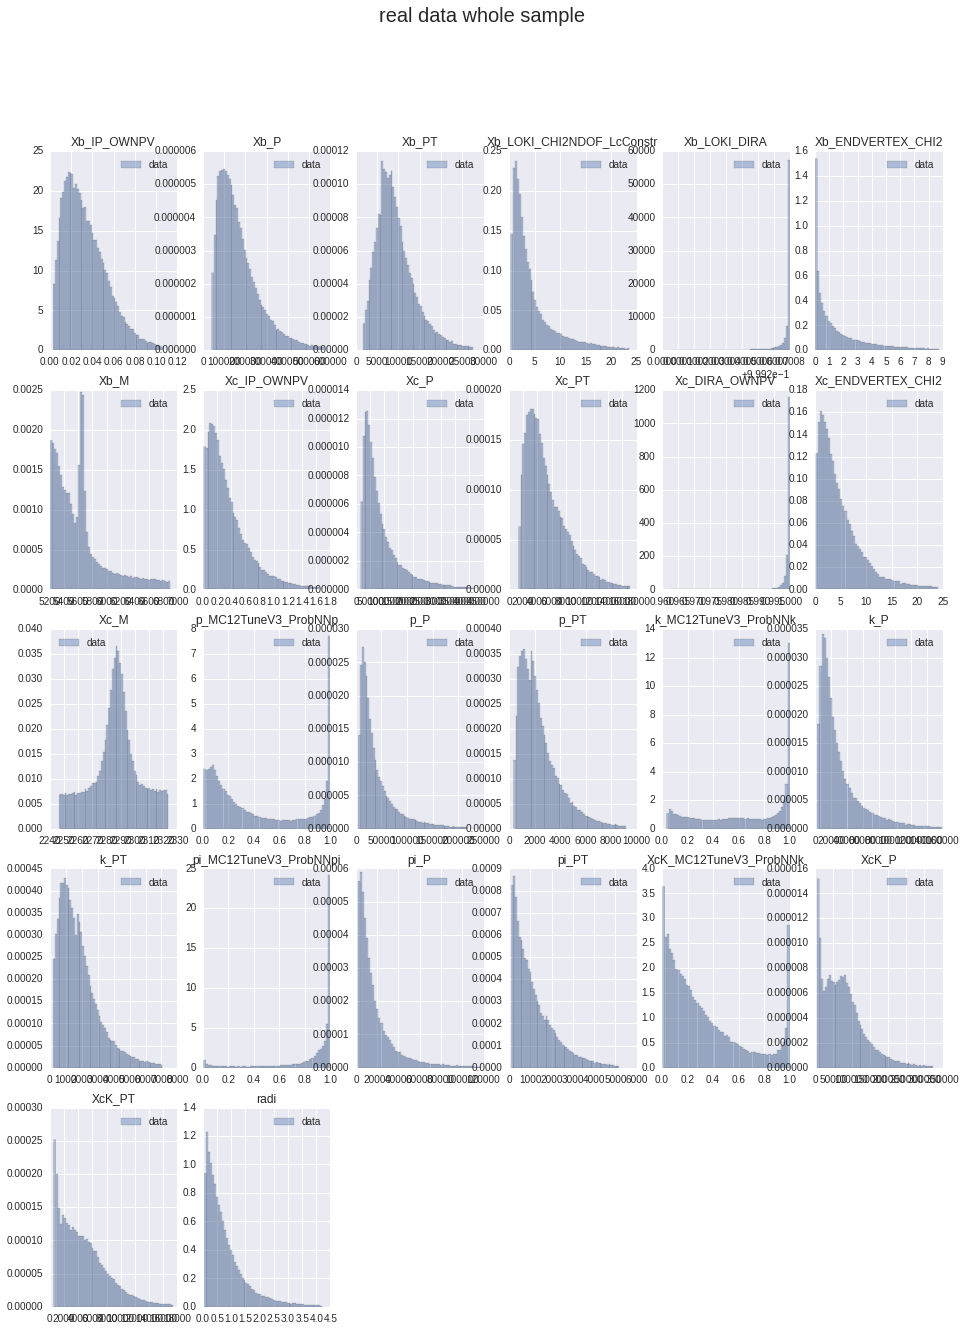

In [67]:
print_features_histograms(real_data,"real data whole sample")

## Separate real data into background and signal. 

In [68]:
xic_mass = 2286
mass_window=10
backgorund_data = real_data[numpy.abs(real_data.Xc_M-xic_mass)>mass_window]
backgorund_data["Label"]=False
signal_data = real_data[numpy.abs(real_data.Xc_M-xic_mass)<mass_window]
signal_data["Label"]=True

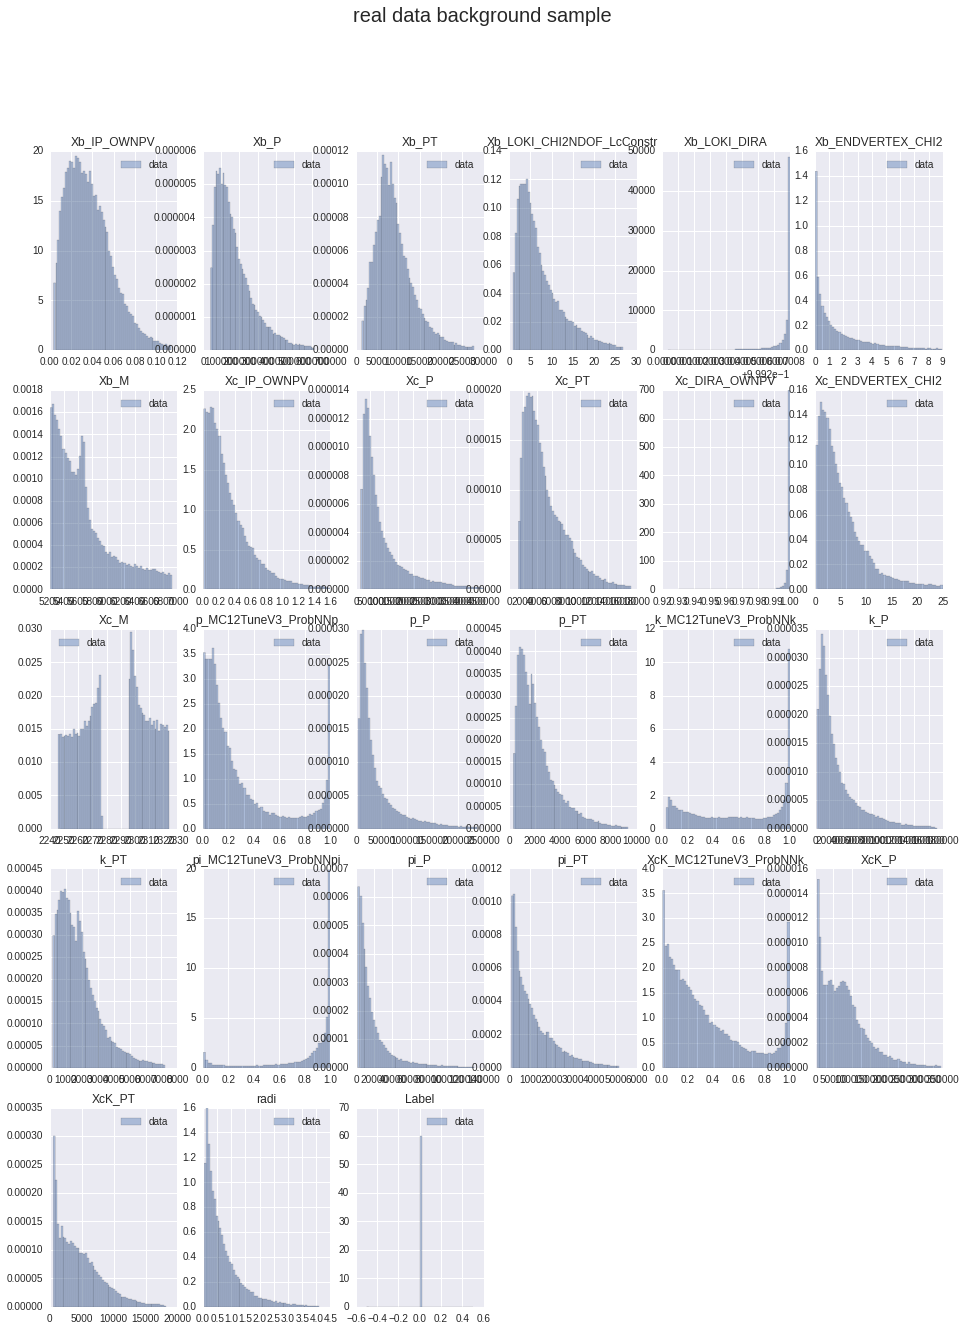

In [69]:
print_features_histograms(backgorund_data,"real data background sample")

## Make comparison plots for background vs MC and signal vs MC

In [70]:
def comparison_plot(data_1, data_2, name_1, name_2):
    hist_params = {'normed': True, 'bins': 60, 'alpha': 0.4}
    # create the figure
    fig = plt.figure(figsize=(16,  25))
    for n, feature in enumerate(data_1):
        # add sub plot on our figure
        ax = fig.add_subplot(data_1.shape[1] // 5 + 1, 6, n + 1)
        # define range for histograms by cutting 1% of data from both ends
        min_value, max_value = numpy.percentile(data_1[feature], [1, 99])
        ax.hist(data_1[feature].values, range=(min_value, max_value), 
                 label=name_1, **hist_params)
        ax.hist(data_2[feature].values, range=(min_value, max_value), 
                 label=name_2, **hist_params)
        ax.legend(loc='best')

        ax.set_title(feature)

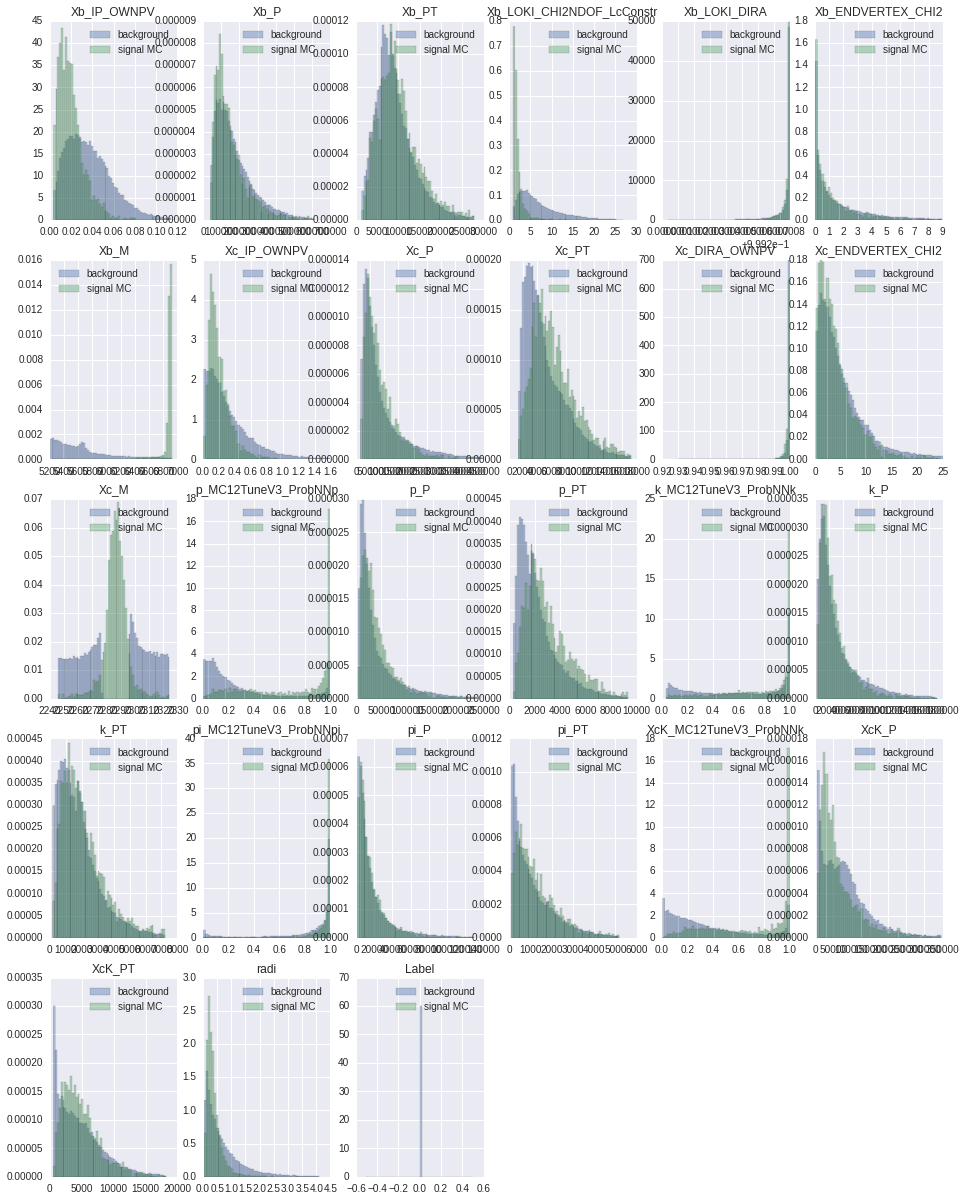

In [71]:
comparison_plot(backgorund_data,signal_mc,"background","signal MC")

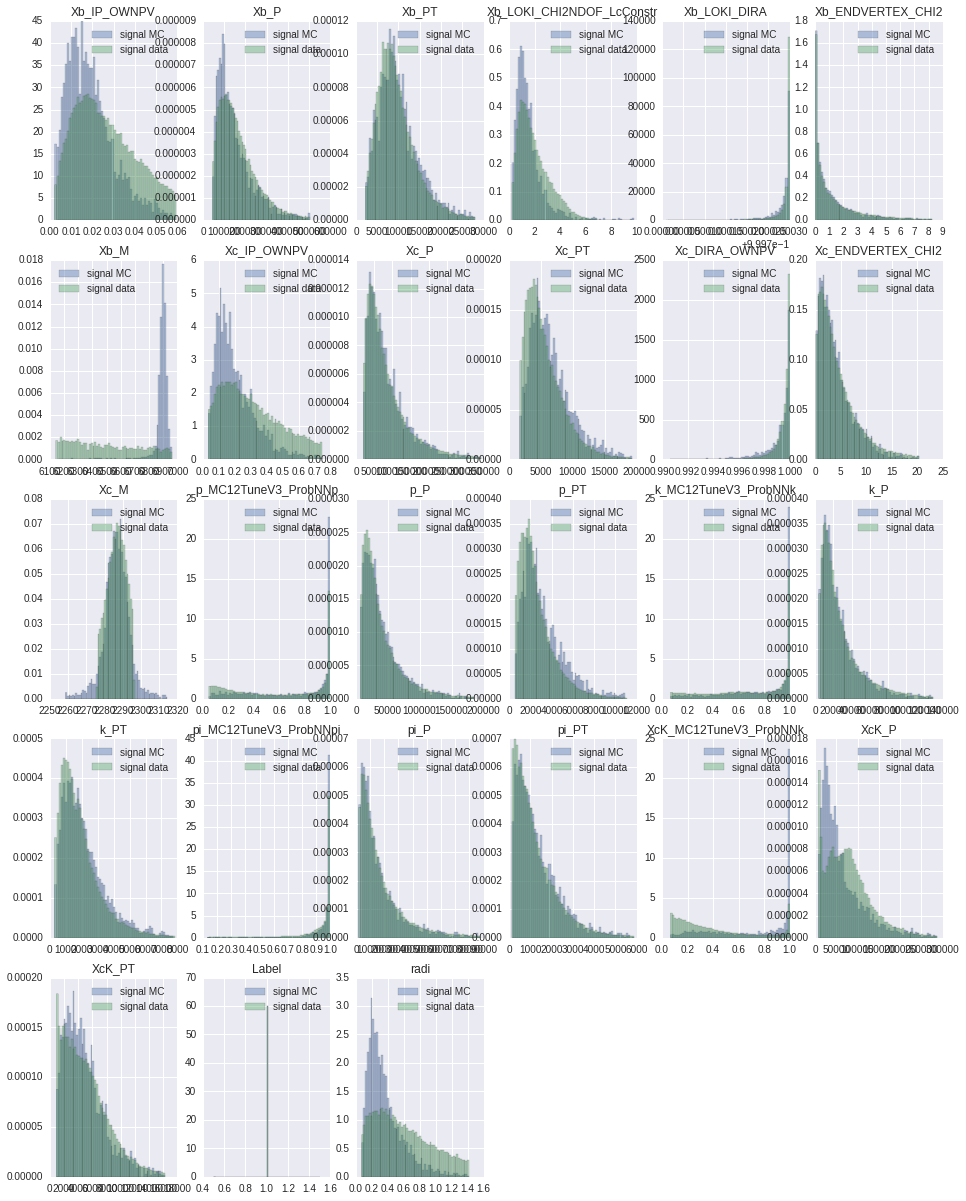

In [72]:
comparison_plot(signal_mc,signal_data,"signal MC","signal data")

## Train BDT 
I wil use BDT configuration from the previous study

In [96]:
mc_sample = signal_mc.count()[0]
backgrund_sample = backgorund_data.count()[0]
print ("mc_sample "+str(mc_sample))
print ("backgrund_sample "+str(backgrund_sample))
print ("ratio "+str(float(backgrund_sample)/mc_sample))

mc_sample 2731
backgrund_sample 53916
ratio 19.7422189674


In [77]:
trainig_data = pd.concat([signal_mc,backgorund_data])
trainig_data = trainig_data.drop(["Xc_M","Xb_M"], axis=1).astype(numpy.float64)
target = trainig_data.Label
trainig_features = trainig_data.drop(["Label"], axis=1).astype(numpy.float64)

In [ ]:
trainX, testX, trainY, testY = train_test_split(trainig_features, target, random_state=42,train_size=0.7 )

gb = xgb.XGBClassifier( n_estimators=400, learning_rate=0.2, scale_pos_weight=20, max_depth=6, verbose =3)

gb.fit(trainX,trainY)

In [79]:
print "ROC AUC score"
roc_auc_score(testY, gb.predict_proba(testX)[:, 1])

ROC AUC score


0.99191447418961687

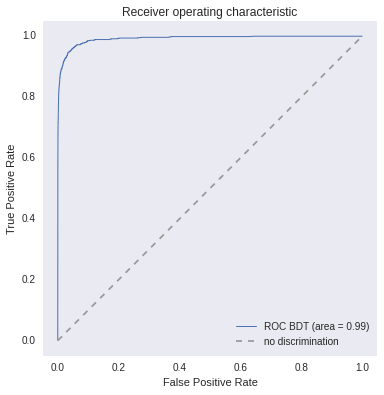

In [80]:
plt.figure(figsize=[6, 6])
fpr, tpr, thresholds = roc_curve(testY, gb.predict_proba(testX)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC BDT (area = %0.2f)'%(roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='no discrimination')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [82]:
signal_mc_to_bdt = signal_mc.drop(["Xc_M","Xb_M","Label"], axis=1).astype(numpy.float64)
mc_scores = gb.predict_proba(signal_mc_to_bdt)[:,1]
signal_data_to_bdt = signal_data.drop(["Xc_M","Xb_M","Label"], axis=1).astype(numpy.float64)
data_signal_scores = gb.predict_proba(signal_data_to_bdt)[:,1]

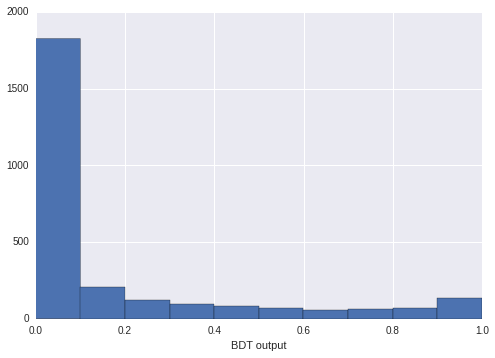

In [85]:
plt.figure()
plt.hist(mc_scores)
plt.xlabel('BDT output')
plt.show()

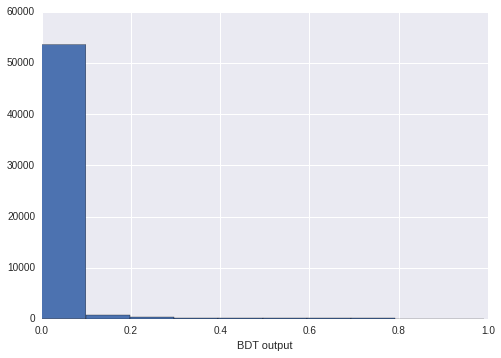

In [86]:
plt.figure()
plt.hist(data_signal_scores)
plt.xlabel('BDT output')
plt.show()